In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
df=pd.read_excel('/content/covid19_clinical_dataset.xlsx')
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [313]:
df.shape

(5644, 111)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [315]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,0.0,5.130000e+02,3.970000e+02,5.060000e+02,4.240000e+02,3.710000e+02,3.700000e+02,2.250000e+02,2.260000e+02,1.530000e+02,1.820000e+02,1.820000e+02,1.820000e+02,1.440000e+02,5.000000e+01,4.000000e+01,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.0,1.360000e+02,1.360000e+02,1.360000e+02,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.0,7.000000e+01,0.0,7.000000e+01,0.0,9.100000e+01,1.330000e+02,1.010000e+02,0.0,3.000000e+00,1.040000e+02,2.300000e+01,2.700000e+01,8.000000e+00,0.0,1.300000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633740e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,NaN,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439583e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215406e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,0.0,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373770e-09,8.602732e-09,1.382582e-08,0.0,-2.554485e-09,NaN,7.557017e-09,NaN,-9.824941e-10,-4.733640e-09,1.733551e-09,NaN,-1.986821e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-3.725290e-09,NaN,-5.731216e-09,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000833e+00,1.000832e+00,1.002413e+00,NaN,1.000976e+00,1.001262e+00,1.000990e+00,1.001181e+00,1.001350e+00,1.001354e+00,1.002230e+00,1.002220e+00,1.003284e+00,1.002759e+00,1.002759e+00,1.002759e+00,1.003490e+00,1.010153e+00,1.012739e+00,1.003697e+00,1.003697e+00,1.0036

In [316]:
df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [317]:
# Changing the values
df['Patient addmited to semi-intensive unit (1=yes, 0=no)']=df['Patient addmited to semi-intensive unit (1=yes, 0=no)'].replace(1,2)
df['Patient addmited to intensive care unit (1=yes, 0=no)']=df['Patient addmited to intensive care unit (1=yes, 0=no)'].replace(1,3)

In [318]:
Patient_admitted=df['Patient addmited to intensive care unit (1=yes, 0=no)']+df['Patient addmited to regular ward (1=yes, 0=no)']+df['Patient addmited to semi-intensive unit (1=yes, 0=no)']

**Value count with SARS-Cov-2 exam result**

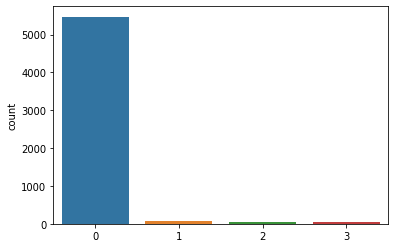

In [319]:
sns.countplot(Patient_admitted,data=df)

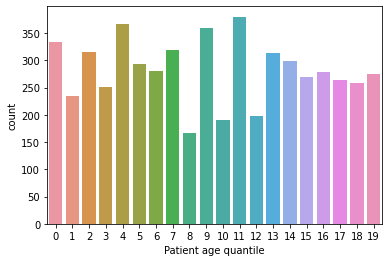

In [369]:
sns.countplot('Patient age quantile',data=df)

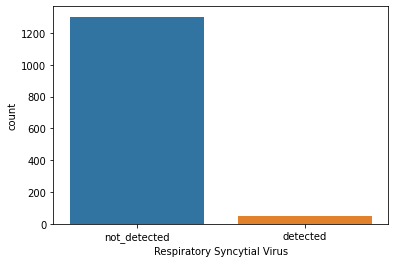

In [320]:
# Respiratory Syncytial Virus 
sns.countplot('Respiratory Syncytial Virus',data=df)

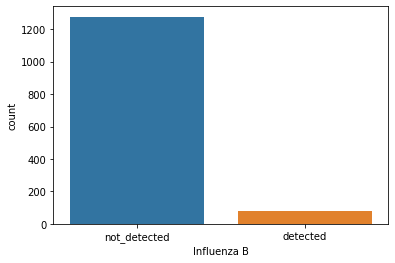

In [321]:
sns.countplot('Influenza B',data=df)

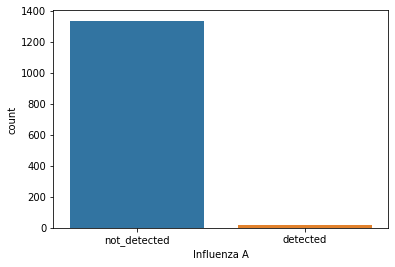

In [322]:
sns.countplot('Influenza A',data=df)

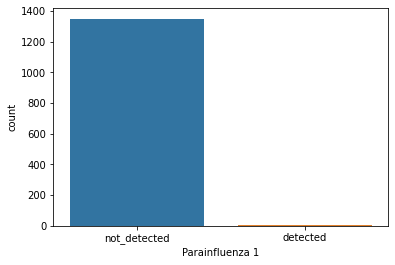

In [323]:
sns.countplot('Parainfluenza 1',data=df)

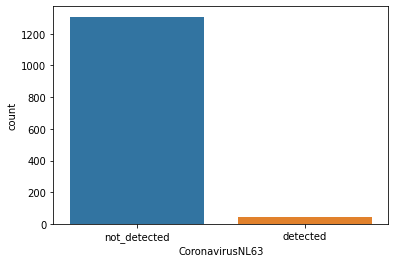

In [324]:
sns.countplot('CoronavirusNL63',data=df)

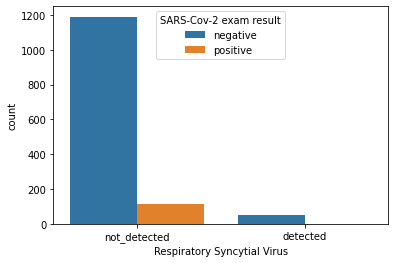

In [325]:

sns.countplot(x='Respiratory Syncytial Virus',hue='SARS-Cov-2 exam result',data=df)

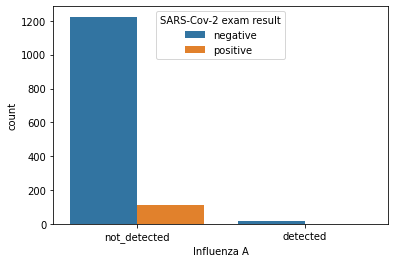

In [326]:
sns.countplot(x='Influenza A',hue='SARS-Cov-2 exam result',data=df)

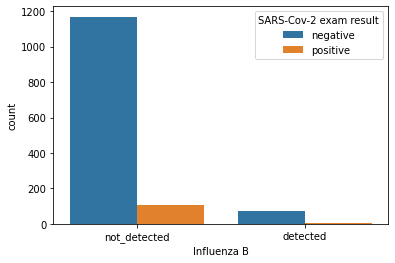

In [327]:
sns.countplot(x='Influenza B',hue='SARS-Cov-2 exam result',data=df)

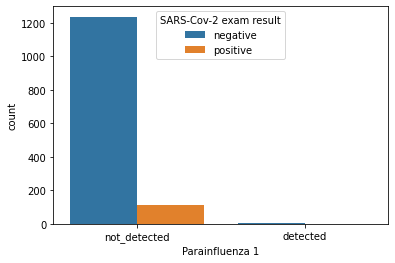

In [328]:
sns.countplot(x='Parainfluenza 1',hue='SARS-Cov-2 exam result',data=df)

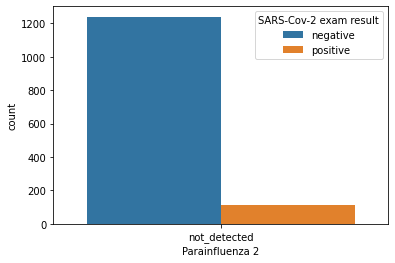

In [329]:
sns.countplot(x='Parainfluenza 2',hue='SARS-Cov-2 exam result',data=df)

In [330]:
# concatinating the new columns with new 
df=pd.concat([df,Patient_admitted],axis=1)
df.drop(["Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"],axis=1,inplace =True)

In [331]:
# replacing null values with means
df['Urine - pH'].fillna(6.5,inplace=True)
df['Hemoglobin'].fillna('absent',inplace=True)

In [332]:
df.drop(['Myeloblasts', 'Urine - Sugar'], axis=1,inplace=True)
df.drop(['Mycoplasma pneumoniae', 'Fio2 (venous blood gas analysis)'], axis=1,inplace=True)


In [333]:
df.drop(['Partial thromboplastin time\xa0(PTT)\xa0', 'Prothrombin time (PT), Activity','D-Dimer'], axis=1,inplace=True)
df.drop(['Vitamin B12','Albumin'],axis=1,inplace=True)
df.drop(['Urine - pH','Urine - Leukocytes','Hemoglobin'],axis=1,inplace=True)
df.drop(['Urine - Esterase','Urine - Aspect','Urine - Hemoglobin'],axis=1,inplace=True)

In [334]:
df[df.columns]=df[df.columns].fillna(df.mean())
df.rename(columns={0: 'Patient addmited'},inplace=True)

In [335]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,...,Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Patient addmited
0,44477f75e8169d2,13,negative,-2.186214e-09,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633740e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,...,-1.075130e-09,-7.909394e-09,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373770e-09,8.602732e-09,1.382582e-08,NaN,NaN,NaN,-2.554485e-09,NaN,NaN,NaN,7.557017e-09,NaN,NaN,NaN,NaN,-9.824941e-10,-4.733640e-09,1.733551e-09,-6.483438e-09,7.288611e-09,-1.655685e-09,-3.725290e-09,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09,0
1,126e9dd13932f68,17,negative,2.365154e-01,-5.174130e-01,1.067657e-02,1.020042e-01,3.183658e-01,-9.507903e-01,-9.461035e-02,-2.237665e-01,-2.922693e-01,1.482158e+00,1.661924e-01,3.575467e-01,-6.250727e-01,-1.406481e-01,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-6.190860e-01,1.198059e+00,-1.478949e-01,2.089928e+00,-3.057871e-01,8.625116e-01,...,-1.075130e-09,-7.909394e-09,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373770e-09,8.602732e-09,1.382582e-08,NaN,NaN,NaN,-2.554485e-09,NaN,NaN,NaN,7.557017e-09,NaN,NaN,NaN,NaN,-9.824941e-10,-4.733640e-09,1.733551e-09,-6.483438e-09,7.288611e-09,-1.655685e-09,-3.725290e-09,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09,0
2,a46b4402a0e5696,8,negative,-2.186214e-09,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633740e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,...,-1.075130e-09,-7.909394e-09,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373770e-09,8.602732e-09,1.382582e-08,NaN,NaN,NaN,-2.554485e-09,NaN,NaN,NaN,7.557017e-09,NaN,NaN,NaN,NaN,-9.824

In [336]:
df.isnull().sum()

Patient ID                            0
Patient age quantile                  0
SARS-Cov-2 exam result                0
Hematocrit                            0
Platelets                             0
                                     ..
pO2 (arterial blood gas analysis)     0
Arteiral Fio2                         0
Phosphor                              0
ctO2 (arterial blood gas analysis)    0
Patient addmited                      0
Length: 94, dtype: int64

In [337]:
def myfillna(series):
  if  series.dtype is pd.np.dtype(object):
    return series.fillna('not_detected')  
  else:
    return series

In [338]:
df=df.apply(myfillna)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


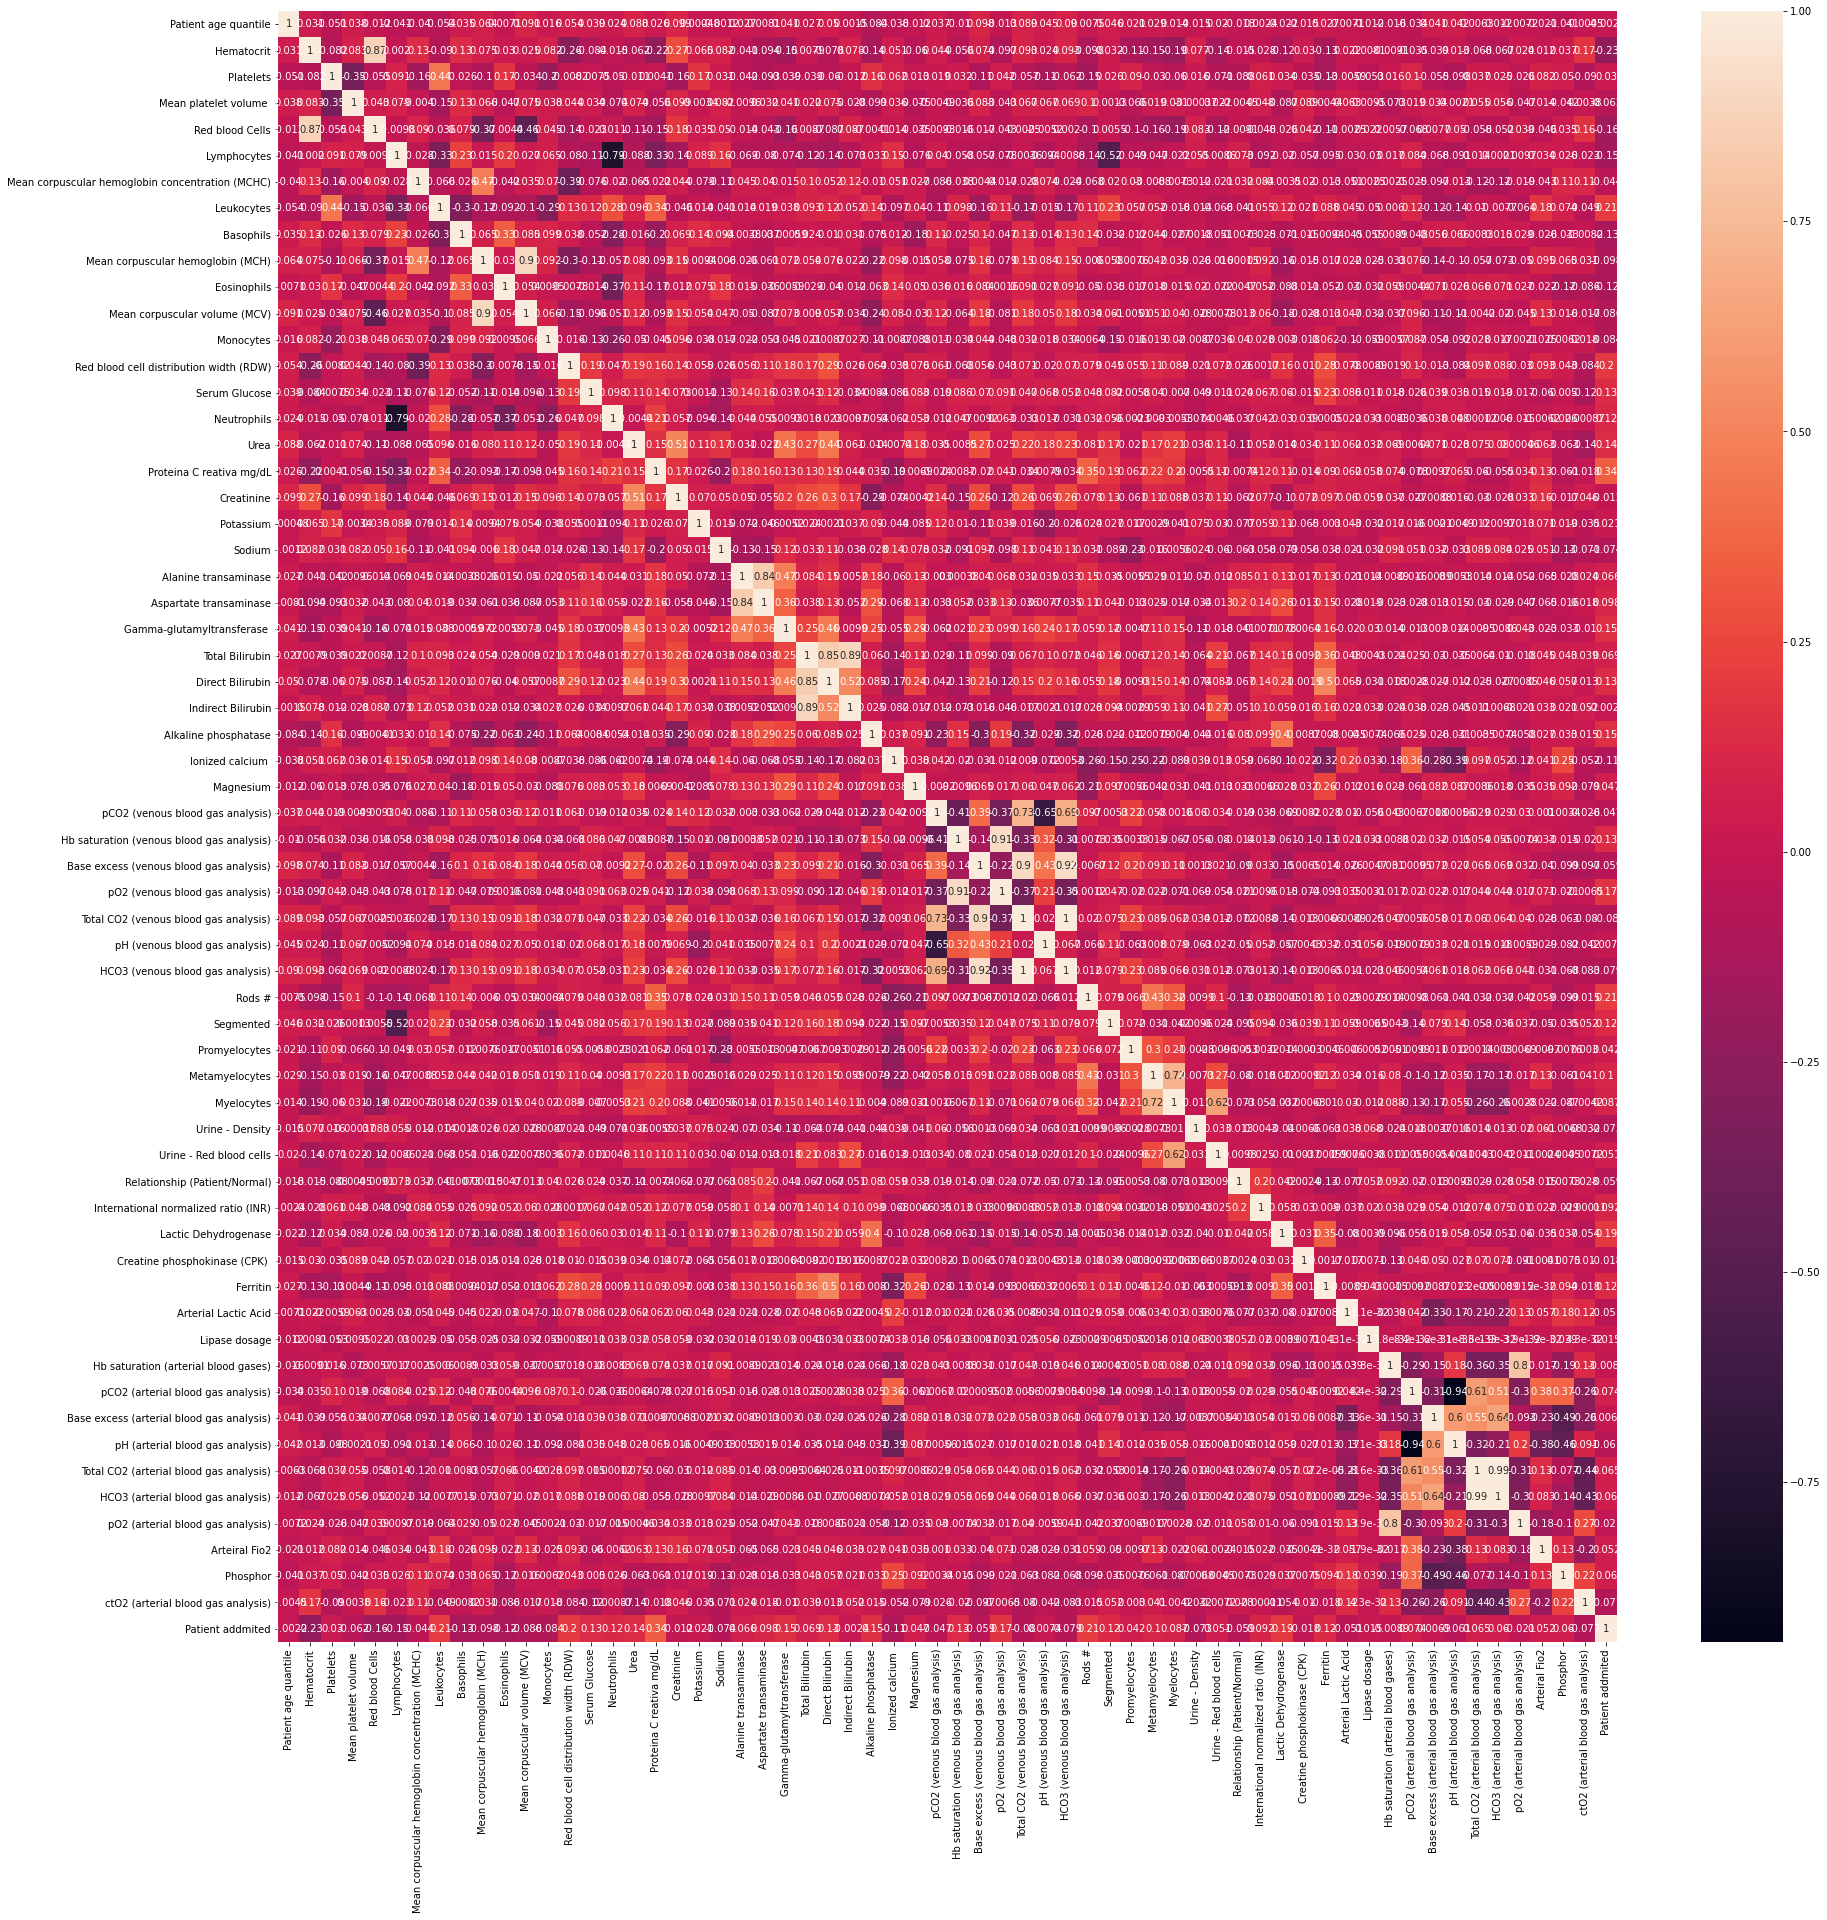

In [339]:
corr_hmap=df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 94 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient ID                                        5644 non-null   object 
 1   Patient age quantile                              5644 non-null   int64  
 2   SARS-Cov-2 exam result                            5644 non-null   object 
 3   Hematocrit                                        5644 non-null   float64
 4   Platelets                                         5644 non-null   float64
 5   Mean platelet volume                              5644 non-null   float64
 6   Red blood Cells                                   5644 non-null   float64
 7   Lymphocytes                                       5644 non-null   float64
 8   Mean corpuscular hemoglobin concentration (MCHC)  5644 non-null   float64
 9   Leukocytes         

In [341]:
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,...,Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Patient addmited
0,44477f75e8169d2,13,negative,-2.186214e-09,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633740e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,...,-1.075130e-09,-7.909394e-09,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373770e-09,8.602732e-09,1.382582e-08,not_detected,not_detected,not_detected,-2.554485e-09,not_detected,not_detected,not_detected,7.557017e-09,not_detected,not_detected,not_detected,not_detected,-9.824941e-10,-4.733640e-09,1.733551e-09,-6.483438e-09,7.288611e-09,-1.655685e-09,-3.725290e-09,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09,0
1,126e9dd13932f68,17,negative,2.365154e-01,-5.174130e-01,1.067657e-02,1.020042e-01,3.183658e-01,-9.507903e-01,-9.461035e-02,-2.237665e-01,-2.922693e-01,1.482158e+00,1.661924e-01,3.575467e-01,-6.250727e-01,-1.406481e-01,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-6.190860e-01,1.198059e+00,-1.478949e-01,2.089928e+00,-3.057871e-01,8.625116e-01,...,-1.075130e-09,-7.909394e-09,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373770e-09,8.602732e-09,1.382582e-08,not_detected,not_detected,not_detected,-2.554485e-09,not_detected,not_detected,not_detected,7.557017e-09,not_detected,not_detected,not_detected,not_detected,-9.824941e-10,-4.733640e-09,1.733551e-09,-6.483438e-09,7.288611e-09,-1.655685e-09,-3.725290e-09,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09,0
2,a46b4402a0e5696,8,negative,-2.186214e-09,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633740e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,not_detected,not_detected,n

In [342]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [343]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,...,Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Patient addmited
0,1588,13,0,93,126,21,108,152,32,262,4,53,20,99,61,19,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,152,21,143,57,10,9,...,33,71,38,43,39,2,29,1,1,1,1,1,0,11,1,1,5,27,1,1,1,2,15,15,44,50,16,8,5,10,18,11,7,10,10,17,6,9,10,0
1,451,17,0,104,85,22,114,184,22,240,3,47,55,108,74,11,26,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,94,38,122,107,8,12,...,33,71,38,43,39,2,29,1,1,1,1,1,0,11,1,1,5,27,1,1,1,2,15,15,44,50,16,8,5,10,18,11,7,10,10,17,6,9,10,0
2,3669,8,0,93,126,21,108,152,32,262,4,53,20,99,61,19,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,152,21,143,57,10,9,...,33,71,38,43,39,2,29,1,1,1,1,1,0,11,1,1,5,27,1,1,1,2,15,15,44,50,16,8,5,10,18,11,7,10,10,17,6,9,10,0
3,5457,5,0,93,126,21,108,152,32,262,4,53,20,99,61,19,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,152,21,143,57,10,9,...,33,71,38,43,39,2,29,1,1,1,1,1,0,11,1,1,5,27,1,1,1,2,15,15,44,50,16,8,5,10,18,11,7,10,10,17,6,9,10,0
4,4843,15,0,93,126,21,108,152,32,262,4,53,20,99,61,19,31,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,152,21,143,57,10,9,...,33,71,38,43,39,2,29,1,1,1,1,1,0,11,1,1,5,27,1,1,1,2,15,15,44,50,16,8,5,10,18,11,7,10,10,17,6,9,10,0


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 94 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Patient ID                                        5644 non-null   int64
 1   Patient age quantile                              5644 non-null   int64
 2   SARS-Cov-2 exam result                            5644 non-null   int64
 3   Hematocrit                                        5644 non-null   int64
 4   Platelets                                         5644 non-null   int64
 5   Mean platelet volume                              5644 non-null   int64
 6   Red blood Cells                                   5644 non-null   int64
 7   Lymphocytes                                       5644 non-null   int64
 8   Mean corpuscular hemoglobin concentration (MCHC)  5644 non-null   int64
 9   Leukocytes                               

In [345]:
x=df.drop(['SARS-Cov-2 exam result'],axis=1)
y=df['SARS-Cov-2 exam result']
print(x,y)

      Patient ID  ...  Patient addmited
0           1588  ...                 0
1            451  ...                 0
2           3669  ...                 0
3           5457  ...                 0
4           4843  ...                 0
...          ...  ...               ...
5639        3892  ...                 0
5640        1860  ...                 0
5641        2125  ...                 0
5642        4316  ...                 0
5643         918  ...                 0

[5644 rows x 93 columns] 0       0
1       0
2       0
3       0
4       0
       ..
5639    1
5640    0
5641    0
5642    0
5643    1
Name: SARS-Cov-2 exam result, Length: 5644, dtype: int64


In [346]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


(3950, 93) (1694, 93)
(3950,) (1694,)


In [347]:
# Applying diffrent Models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [348]:
KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [349]:
models=[]
models.append(('KNeighborsClassifier',KNN))
# models.append(('SVC',sv))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [350]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [351]:
!pip install scikit-plot

In [352]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import scikitplot as skplt

****************************** KNeighborsClassifier ********************************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score= 0.9008264462809917


cross_val_score= 0.8997172161613727


roc_auc_score= 0.5023391331286347


classification_report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1527
           1       0.33      0.01      0.01       167

    accuracy                           0.90      1694
   macro avg       0.62      0.50      0.48      1694
weighted avg       0.85      0.90      0.86      1694



[[1525    2]
 [ 166    1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************** LogisticRegression ********************************************




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.9037780401416765




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


cross_val_score= 0.9014897635264099


roc_auc_score= 0.5279754832182394


classification_report
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1527
           1       0.62      0.06      0.11       167

    accuracy                           0.90      1694
   macro avg       0.77      0.53      0.53      1694
weighted avg       0.88      0.90      0.87      1694



[[1521    6]
 [ 157   10]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************** DecisionTreeClassifier ********************************************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_

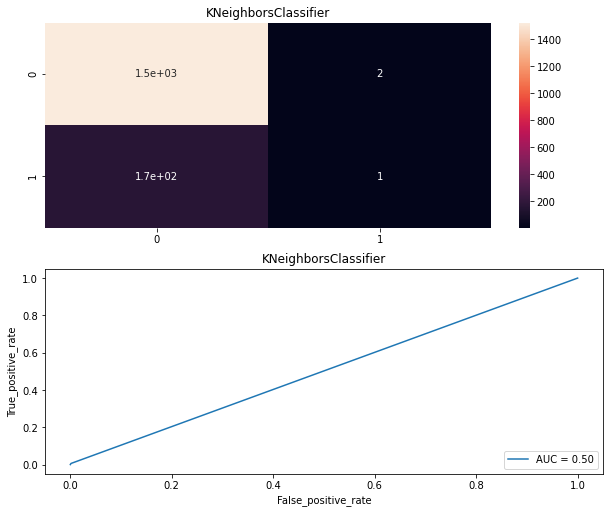

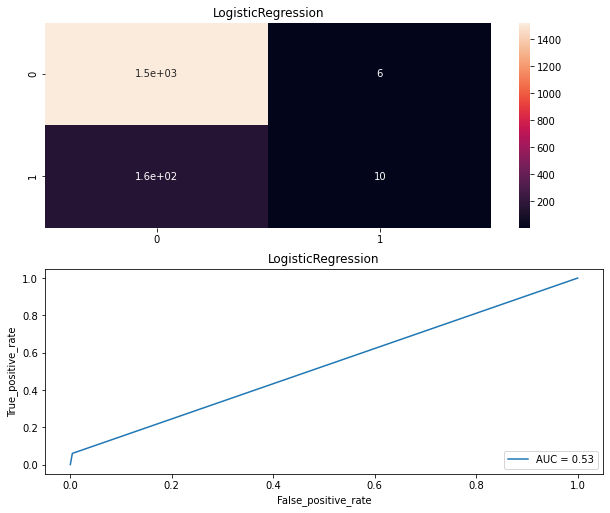

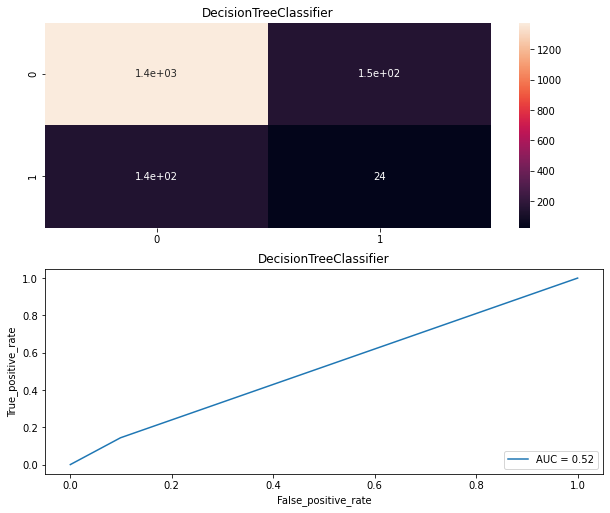

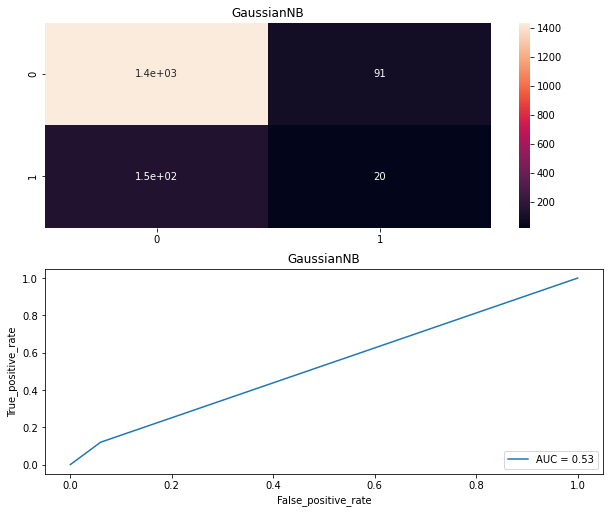

In [353]:
Model = []
score = []
cvs = []
rocscore=[]
for name,model in models:
    print('******************************',name,'********************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=8,scoring='accuracy').mean()
    print("cross_val_score=",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [354]:
result=pd.DataFrame({'Model':models,'Accuracy_score':AS,'Cross_val_score':sc,'ROC_AUC_curve':score})

In [355]:
result

,Model,Accuracy_score,Cross_val_score,ROC_AUC_curve
0,"(KNeighborsClassifier, KNeighborsClassifier(al...",0.859504,0.861091,90.082645
1,"(LogisticRegression, LogisticRegression(C=1.0,...",0.859504,0.861091,90.377804
2,"(DecisionTreeClassifier, DecisionTreeClassifie...",0.859504,0.861091,82.644628
3,"(GaussianNB, GaussianNB(priors=None, var_smoot...",0.859504,0.861091,85.950413


In [356]:
# Decision Tree and GaussianNB model perform Better 
# (LogisticRegression, LogisticRegression	model because Accuracy,Cross_val and Roc curve reach 90.37.
from sklearn.externals import joblib
joblib.dump(LR,'PROJECT20_MODEL1.pkl')
model=joblib.load('PROJECT20_MODEL1.pkl')
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

Prediction with Patient addmited 

In [357]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,...,Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Patient addmited
0,1588,13,0,93,126,21,108,152,32,262,4,53,20,99,61,19,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,152,21,143,57,10,9,...,33,71,38,43,39,2,29,1,1,1,1,1,0,11,1,1,5,27,1,1,1,2,15,15,44,50,16,8,5,10,18,11,7,10,10,17,6,9,10,0
1,451,17,0,104,85,22,114,184,22,240,3,47,55,108,74,11,26,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,94,38,122,107,8,12,...,33,71,38,43,39,2,29,1,1,1,1,1,0,11,1,1,5,27,1,1,1,2,15,15,44,50,16,8,5,10,18,11,7,10,10,17,6,9,10,0
2,3669,8,0,93,126,21,108,152,32,262,4,53,20,99,61,19,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,152,21,143,57,10,9,...,33,71,38,43,39,2,29,1,1,1,1,1,0,11,1,1,5,27,1,1,1,2,15,15,44,50,16,8,5,10,18,11,7,10,10,17,6,9,10,0
3,5457,5,0,93,126,21,108,152,32,262,4,53,20,99,61,19,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,152,21,143,57,10,9,...,33,71,38,43,39,2,29,1,1,1,1,1,0,11,1,1,5,27,1,1,1,2,15,15,44,50,16,8,5,10,18,11,7,10,10,17,6,9,10,0
4,4843,15,0,93,126,21,108,152,32,262,4,53,20,99,61,19,31,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,152,21,143,57,10,9,...,33,71,38,43,39,2,29,1,1,1,1,1,0,11,1,1,5,27,1,1,1,2,15,15,44,50,16,8,5,10,18,11,7,10,10,17,6,9,10,0


In [358]:
x1=df.iloc[:,1:-1]
y1=df.iloc[:,-1]
x1,y1

(      Patient age quantile  ...  ctO2 (arterial blood gas analysis)
 0                       13  ...                                  10
 1                       17  ...                                  10
 2                        8  ...                                  10
 3                        5  ...                                  10
 4                       15  ...                                  10
 ...                    ...  ...                                 ...
 5639                     3  ...                                  10
 5640                    17  ...                                  10
 5641                     4  ...                                  10
 5642                    10  ...                                  10
 5643                    19  ...                                  10
 
 [5644 rows x 92 columns], 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5639    0
 5640    0
 5641    0
 5642    0
 5643    0
 Name: Patient addmited

In [359]:
from sklearn.model_selection import train_test_split,cross_val_score
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=20,stratify=y1)
print(x1_train.shape,x1_test.shape)
print(y1_train.shape,y1_test.shape)

(3950, 92) (1694, 92)
(3950,) (1694,)


In [360]:
# Applying diffrent Models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [361]:
models=[]
models.append(('KNeighborsClassifier',KNN))
# models.append(('SVC',sv))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [362]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [363]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import scikitplot as skplt

In [364]:
def multi_class_ROC(model, X1_test, y1_test):
  y_predict_proba = model.predict_proba(X1_test)
  skplt.metrics.plot_roc_curve(y1_test, y_predict_proba)
  plt.show()

****************************** KNeighborsClassifier ********************************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score= 0.9722550177095631


cross_val_score= 0.9702350467583004




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


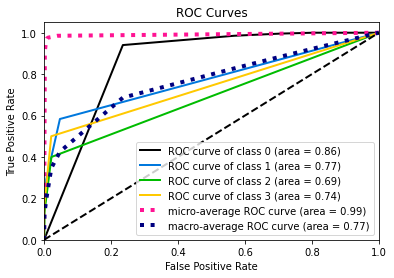




****************************** LogisticRegression ********************************************




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.9728453364817001




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


cross_val_score= 0.969350091006088




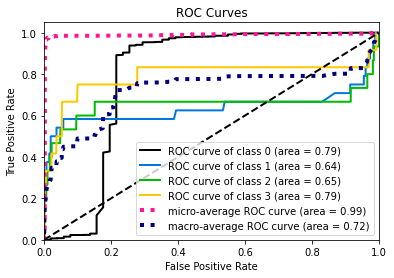




****************************** DecisionTreeClassifier ********************************************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6, splitter='best')


Accuracy_score= 0.9663518299881936


cross_val_score= 0.9647439276972323




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


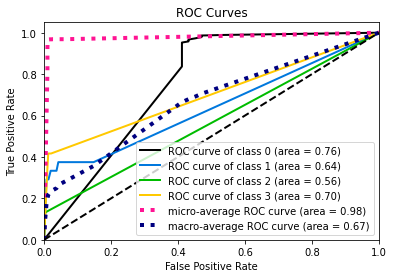




****************************** GaussianNB ********************************************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score= 0.89728453364817


cross_val_score= 0.898494319964853




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


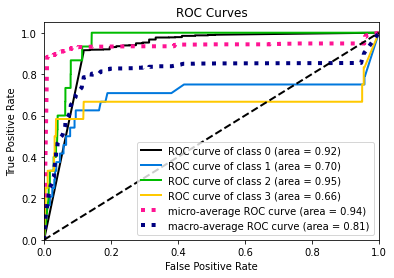

In [365]:
Model = []
score = []
cvs = []
rocscore=[]
for name,model in models:
    print('******************************',name,'********************************************')
    print('\n')
    Model.append(name)
    model.fit(x1_train,y1_train)
    print(model)
    pre=model.predict(x1_test)
    y_predict_proba=pre
    print('\n')
    AS=accuracy_score(y1_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x1,y1,cv=10,scoring='accuracy').mean()
    print("cross_val_score=",sc)
    cvs.append(sc*100)
    print('\n')
    multi_class_ROC(model, x1_test, y1_test)
    print('\n\n')

In [366]:
result=pd.DataFrame({'Model':models,'Accuracy_score':AS,'Cross_val_score':sc,'ROC_AUC_curve':score})
result

,Model,Accuracy_score,Cross_val_score,ROC_AUC_curve
0,"(KNeighborsClassifier, KNeighborsClassifier(al...",0.897285,0.898494,97.225502
1,"(LogisticRegression, LogisticRegression(C=1.0,...",0.897285,0.898494,97.284534
2,"(DecisionTreeClassifier, DecisionTreeClassifie...",0.897285,0.898494,96.635183
3,"(GaussianNB, GaussianNB(priors=None, var_smoot...",0.897285,0.898494,89.728453


Saving KNN Model 


In [367]:

from sklearn.externals import joblib
joblib.dump(KNN,'PROJECT20.1_MODEL1.pkl')
model=joblib.load('PROJECT20.1_MODEL1.pkl')
model.predict(x1_test)

array([0, 0, 0, ..., 0, 0, 0])

**Finding from EDA **

*  Respiratory Syncytial Virus, Parainfluenza 1,Influenza A.Influenza B  had not detected in SARS-Cov-2 case.
* Their is no strong correlation between columns in dataset.
* Around 10% of SARS-Cov-2 patent  having CoronavirusNL63.
*  Most of the Patient not admitted to any wards.

